Python爬取「科技新報」和「科技報橘」網站，並進一步進行斷詞和共現性分析

In [5]:
# # 載入必要的Python庫
# # 要進行網站爬蟲，需要使用Python中的requests、BeautifulSoup和re庫。要進行斷詞和共現性分析，
# # 需要使用jieba、pandas、numpy和networkx庫。可以使用以下代碼載入這些庫：
# import requests
# from bs4 import BeautifulSoup
# import re
# import jieba
# import pandas as pd
# import numpy as np
# import networkx as nx
# import matplotlib.pyplot as plt

In [6]:
# # 獲取網站數據
# # 使用requests庫獲取網站數據。以下是一個簡單的例子：
# url_list = ['https://technews.tw/', 'https://buzzorange.com/techorange/']

# for url in url_list:
#     html = requests.get(url).text
#     soup = BeautifulSoup(html, 'html.parser')
#     news_titles = soup.find_all('h1', class_='entry-title')

#     for title in news_titles:
#         print(title.text)
# # 在上述例子中，我們使用了requests庫獲取了科技新報和動區動趨網站的HTML代碼。
# # 然後，我們使用BeautifulSoup庫解析HTML代碼並找到所有新聞標題。
# # 最後，我們使用for迴圈遍歷新聞標題，並將它們打印到終端。

In [7]:
# # 斷詞
# # 使用jieba庫對新聞標題進行斷詞。以下是一個簡單的例子：
# url_list = ['https://technews.tw/', 'https://buzzorange.com/techorange/']
# keywords = []

# for url in url_list:
#     html = requests.get(url).text
#     soup = BeautifulSoup(html, 'html.parser')
#     news_titles = soup.find_all('h1', class_='entry-title')

#     for title in news_titles:
#         words = jieba.lcut(title.text)
#         keywords += [word for word in words if len(word) > 1 and re.match('[\u4e00-\u9fa5]', word)]

# print(keywords)
# # 在上述例子中，我們使用了jieba庫對所有新聞標題進行了斷詞。
# # 我們排除了單個漢字和單個英文字母，並將結果存儲在名為“keywords”的列表中。

### 篩選科技相關詞彙
### 使用正則表達式篩選與科技領域相關的詞彙。以下是一個簡單的例子：

當我們已經斷詞後，我們可以進一步使用正則表達式篩選出與科技相關的詞彙，
例如「人工智慧」、「區塊鏈」、「物聯網」等。
篩選詞彙的方法可以使用正則表達式或是定義一個包含科技相關詞彙的詞典，然後進行匹配。

接下來，我們可以使用pandas庫來計算詞彙的出現頻率，然後將其轉換為一個稀疏矩陣。
這可以使用pandas的get_dummies函數實現，該函數會將詞彙轉換為一個稀疏矩陣。
然後，我們可以使用numpy庫的dot函數計算稀疏矩陣的共現性矩陣。

最後，我們可以使用networkx庫繪製詞彙共現性網絡。
使用networkx庫可以方便地繪製詞彙共現性網絡。
我們可以使用共現性矩陣來創建一個加權圖，然後使用networkx庫的draw函數將圖繪製出來。
我們還可以對圖形進行一些額外的調整，例如調整節點大小和顏色，以及調整邊線的粗細和顏色等。
最後，我們可以使用matplotlib庫來顯示網絡圖。


In [8]:
# import requests
# from bs4 import BeautifulSoup
# import jieba
# import re
# import pandas as pd
# import numpy as np
# import networkx as nx
# import matplotlib.pyplot as plt

# # 爬取科技新報網站
# url1 = 'https://technews.tw/'
# response1 = requests.get(url1)
# soup1 = BeautifulSoup(response1.text, 'html.parser')
# news1 = soup1.select('h1.entry-title > a')[:10]  # 取前10筆新聞

# # 爬取科技報橘網站
# url2 = 'https://buzzorange.com/techorange/'
# response2 = requests.get(url2)
# soup2 = BeautifulSoup(response2.text, 'html.parser')
# news2 = soup2.select('h4.entry-title > a')[:10]  # 取前10筆新聞

# # 合併新聞標題
# news = [n.text for n in news1] + [n.text for n in news2]

# # 定義科技相關詞彙
# tech_words = ['人工智慧', '機器學習', '區塊鏈', '物聯網', '雲端運算', '大數據', '虛擬實境']

# # 篩選科技相關詞彙並斷詞
# tokens = []
# for n in news:
#     words = jieba.cut(n)
#     for w in words:
#         if re.match('.*[\u4e00-\u9fa5]+.*', w) and w in tech_words:
#             tokens.append(w)

# # 計算詞頻並轉換為稀疏矩陣
# df = pd.get_dummies(tokens)
# co_occurrence = np.dot(df.T, df)

# # 繪製共現性網絡圖
# G = nx.Graph()
# for i, word1 in enumerate(df.columns):
#     for j, word2 in enumerate(df.columns):
#         if co_occurrence[i, j] > 0:
#             G.add_edge(word1, word2, weight=co_occurrence[i, j])

# # 調整節點大小和顏色，以及邊線的粗細和顏色
# node_size = [df[word].sum()*10 for word in df.columns]
# node_color = [np.random.rand(3,) for i in range(len(df.columns))]
# edge_width = [d['weight']*0.2 for (u, v, d) in G.edges(data=True)]
# edge_color = [np.random.rand(3,) for i in range(len(G.edges))]

# # 繪製圖形
# pos = nx.spring_layout(G, k=0.3, iterations=50)
# nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, alpha=0.7)
# nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, alpha=0.5)
# nx.draw_networkx_labels(G, pos, font_size=12, font_family='SimHei', font_weight='bold', alpha=0.8)
# plt.axis('off')
# plt.show()

#### 繪製圖形

這段程式碼會繪製一個圖形，該圖形呈現科技相關詞彙的共現性分析結果，
其中每個節點表示一個詞彙，節點的大小和顏色代表該詞彙在新聞標題中出現的頻率和其所屬的科技領域，
邊線的粗細和顏色則代表兩個詞彙之間的共現頻率。
該圖形可以幫助我們了解科技相關詞彙之間的關聯性，進而發現一些有趣的趨勢和現象。

網站的 HTML 結構有變化：網站可能在更新後更改了 HTML 結構或者 class 名稱，這樣程式碼就無法正確地解析出新聞標題。

網站有防爬機制：為了防止網站被爬蟲爬取，網站可能會增加一些防爬機制，
例如檢測 HTTP 請求頭信息或者設置 Cookie 驗證機制。
如果你沒有處理這些防爬機制，那麼爬蟲就無法正確地獲取網頁內容。

Python 程式碼中的語法或者庫有錯誤：如果你的程式碼中有語法或者庫的錯誤，那麼程式就無法正確地運行。

如果你遇到了無法運行程式碼的問題，可以嘗試檢查以上三點，並且搜尋相關的解決方案。
此外，建議可以逐步地測試程式碼，從爬取網頁內容開始，逐步確認每一個步驟是否正確，以便找到錯誤的原因和解決方案。

如果你的程式碼沒有出現任何 error，但是仍然無法正常運行，可能有以下原因：

網頁的解析方式有誤：網頁可能是動態生成的，而你使用的是靜態爬蟲，因此無法獲取到完整的網頁內容。
這種情況下，你需要使用動態爬蟲來獲取網頁內容。

程式碼中的邏輯錯誤：即使程式碼沒有出現 error，也有可能存在邏輯錯誤，導致程式無法正確運行。
這種情況下，你需要檢查程式碼中每一個步驟是否正確，以及變數是否正確命名和使用。

網頁的讀取時間過長：有些網頁可能需要較長的時間才能夠完全加載，
如果你的程式碼沒有等待網頁完全加載就開始解析，那麼就無法獲取到完整的網頁內容。
這種情況下，你可以使用 Selenium 等工具來模擬人的操作，等待網頁完全加載後再進行解析。

總之，如果你的程式碼沒有出現任何 error，但是仍然無法正常運行，
那麼你需要逐步檢查程式碼中的每一個步驟，以及可能存在的邏輯錯誤、
網頁解析方式、網頁讀取時間等問題，以便找到錯誤的原因和解決方案。

In [9]:
# import requests
# from bs4 import BeautifulSoup

# url_template = 'https://technews.tw/page/{}/'

# for i in range(1, 6):   # 爬取前5頁的內容
#     url = url_template.format(i)
#     response = requests.get(url)
#     soup = BeautifulSoup(response.text, 'html.parser')
#     news = soup.select('h1.entry-title > a')
#     # 在這裡處理爬取到的資料

上為試爬蟲

## crawler

In [2]:
import requests
from bs4 import BeautifulSoup
import jieba
import jieba.analyse
import re
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams["font.sans-serif"]='Microsoft JhengHei'

In [3]:
# 爬取科技新報網站
url1 = 'https://technews.tw/'
response1 = requests.get(url1)
soup1 = BeautifulSoup(response1.text, 'html.parser')
news1 = soup1.select('h1.entry-title > a')[:15]  # 取前15筆新聞
news1

[<a href="https://technews.tw/2023/03/25/bottled-water-problem/" rel="bookmark" title="瓶裝水是暴利，且加劇缺水與氣候危機">瓶裝水是暴利，且加劇缺水與氣候危機</a>,
 <a href="https://technews.tw/2023/03/25/morris-chang-gordon-moore-condolences/" rel="bookmark" title="摩爾辭世，張忠謀：半導體第一代共同奮鬥朋友所剩無幾">摩爾辭世，張忠謀：半導體第一代共同奮鬥朋友所剩無幾</a>,
 <a href="https://finance.technews.tw/2023/03/25/metcalfe/" rel="bookmark" title="全球風電新增裝置容量降至 86GW！彭博：金風科技取代維斯塔斯奪冠">全球風電新增裝置容量降至 86GW！彭博：金風科技取代維斯塔斯奪冠</a>,
 <a href="https://finance.technews.tw/2023/03/25/turo-prepare-ipo/" rel="bookmark" title="下一隻汽車共享獨角獸 Turo，去年營收成長 59% 營收突破 7 億美元">下一隻汽車共享獨角獸 Turo，去年營收成長 59% 營收突破 7 億美元</a>,
 <a href="https://ccc.technews.tw/2023/03/25/find-my-airpods-2/" rel="bookmark" title="別偷 AirPods 耳機，它基本上就是個 AirTag">別偷 AirPods 耳機，它基本上就是個 AirTag</a>,
 <a href="https://technews.tw/2023/03/25/us-canada-plan-north-american-chip-corridor/" rel="bookmark" title="IBM 加拿大投資為第一步，美加計劃發展「雙邊半導體走道」">IBM 加拿大投資為第一步，美加計劃發展「雙邊半導體走道」</a>,
 <a href="https://technews.tw/2023/03/25/france-retire-a

In [4]:
##### news1 = soup1.select('h1.entry-title > a')[:10]  # 取前10筆新聞

# 使用 BeautifulSoup 模組來解析 HTML 文件中的標籤，並且選取 <h1 class="entry-title"> 標籤下的 <a> 標籤。
# 具體來說， soup1.select('h1.entry-title > a') 這句程式碼中：soup1 是指使用 BeautifulSoup 解析後的 HTML 文件
# select() 方法可以用來選取符合特定 CSS 選擇器的標籤
# 'h1.entry-title > a' 是 CSS 選擇器，表示選取所有標籤名為 <a>，並且是在標籤名為 <h1>，且 class 屬性值為 "entry-title" 的標籤下的 <a> 標籤。其中 > 符號表示要選取直接子元素。
# 因此，這段程式碼的作用是從 HTML 文件中選取所有標題為 <h1>，且 class 屬性值為 "entry-title" 的標籤下的超連結 <a>。

In [5]:
# 爬取動區動趨網站
url2 = 'https://www.blocktempo.com/category/latest-news/'
response2 = requests.get(url2)
soup2 = BeautifulSoup(response2.text, 'html.parser')
news2 = soup2.select('h3.jeg_post_title > a')[:16]  # 取前16筆新聞
news2

[<a href="https://www.blocktempo.com/binance-reboot-spot-trading-at-10-pm-mar-24th/">快訊》幣安於晚間10點恢復「現貨交易、提存款」等功能，追蹤訂單停修</a>,
 <a href="https://www.blocktempo.com/south-korea-looking-for-the-way-to-extradite-do-kwon/">快訊》韓國將引渡 Do Kwon 回國審判，美國檢方同時搶人</a>,
 <a href="https://www.blocktempo.com/do-kwon-arrested-in-montenegro/">重磅》Do Kwon在南歐黑山被逮捕！10個月逃亡告終</a>,
 <a href="https://www.blocktempo.com/powell-says-fed-considered-rate-pause/">鮑爾：美國擴表 3,000億美元「與貨幣政策無關」，有必要 Fed將續升息！</a>,
 <a href="https://www.blocktempo.com/bill-gates-the-age-of-ai-has-begun/">比爾蓋茲宣布「AI時代」來了！點名 OpenAI GPT 成企業勝出關鍵</a>,
 <a href="https://www.blocktempo.com/white-house-presidents-economic-report-blasts-crypto/">拜登政府敵視加密貨幣「沒基本價值」！白宮報告：穩定幣、DeFi 有劇烈風險</a>,
 <a href="https://www.blocktempo.com/ubs-to-buy-credit-suisse-for-1-billion/">快訊》瑞銀(UBS) 擬以 10 億美元「收購瑞士信貸」！不到全盛期市值 2%</a>,
 <a href="https://www.blocktempo.com/financial-supervisory-commission-will-regulate-taiwan-crypto-industry/">台灣加密貨幣監管》中央社 : 行政院最快3月底公布「金管會」為主管機關</a>,


In [6]:
# 合併新聞標題
news = [n.text for n in news1] + [n.text for n in news2]

In [7]:
news

['瓶裝水是暴利，且加劇缺水與氣候危機',
 '摩爾辭世，張忠謀：半導體第一代共同奮鬥朋友所剩無幾',
 '全球風電新增裝置容量降至 86GW！彭博：金風科技取代維斯塔斯奪冠',
 '下一隻汽車共享獨角獸 Turo，去年營收成長 59% 營收突破 7 億美元',
 '別偷 AirPods 耳機，它基本上就是個 AirTag',
 'IBM 加拿大投資為第一步，美加計劃發展「雙邊半導體走道」',
 '退休年齡延至 64 歲，引發法國百萬人上街抗議',
 '污水處理不再昂貴困難，以木材輕鬆去除 80% 染料有毒物',
 '郭明錤：AirPods Pro 2 將推 USB-C 版，平價版似乎暫沒計畫',
 '全台第三座離岸風場啟動，海能風場 376MW 全數完工併聯',
 '美國最新研究發現！阿茲海默症早期徵兆可能在眼睛裡',
 '恐慌蔓延慘遭殃及，分析師強調：德意志銀行不是下個瑞士信貸',
 '生產移出中國，傳蘋果供應商和碩將在印度設第二廠',
 '華府制裁使中國不僅取得晶片難，登月計畫也受挫',
 '英特爾聯合創辨人，摩爾定律發明人 Gordon Moore 辭世，享耆壽 94 歲',
 '快訊》幣安於晚間10點恢復「現貨交易、提存款」等功能，追蹤訂單停修',
 '快訊》韓國將引渡 Do Kwon 回國審判，美國檢方同時搶人',
 '重磅》Do Kwon在南歐黑山被逮捕！10個月逃亡告終',
 '鮑爾：美國擴表 3,000億美元「與貨幣政策無關」，有必要 Fed將續升息！',
 '比爾蓋茲宣布「AI時代」來了！點名 OpenAI GPT 成企業勝出關鍵',
 '拜登政府敵視加密貨幣「沒基本價值」！白宮報告：穩定幣、DeFi 有劇烈風險',
 '快訊》瑞銀(UBS) 擬以 10 億美元「收購瑞士信貸」！不到全盛期市值 2%',
 '台灣加密貨幣監管》中央社 : 行政院最快3月底公布「金管會」為主管機關',
 'FTX重啟傳言加持》FTT大漲53%至1.75鎂！投行Jefferies傳接觸競標者',
 'BitMEX創辦人：隨央行政策大轉向，比特幣將「漲至100萬美元」',
 'ChatGPT 通過 Google 三級工程師面試，年薪破 500 萬台幣！',
 'FTX受害者必讀》10年交易所維權經驗的Tom告訴你：該自己請律師？要等多久？Steaker疑點？',
 '富

In [8]:
orgdata = pd.DataFrame(news, columns=['title'])

In [9]:
orgdata['seg'] = ""
orgdata.head()

,title,seg
0,瓶裝水是暴利，且加劇缺水與氣候危機,
1,摩爾辭世，張忠謀：半導體第一代共同奮鬥朋友所剩無幾,
2,全球風電新增裝置容量降至 86GW！彭博：金風科技取代維斯塔斯奪冠,
3,下一隻汽車共享獨角獸 Turo，去年營收成長 59% 營收突破 7 億美元,
4,別偷 AirPods 耳機，它基本上就是個 AirTag,


In [10]:
jieba.analyse.set_stop_words('stopwords.txt') #stopwords 自己不要的字的字典(自己建立)
index = 0
for documents in orgdata['title']: #從 csv. 檔中的 JOB_DETAIL 欄位中找尋資料
    seg_list = jieba.analyse.extract_tags(documents) #150 為前150個權重最高的單詞
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\happy\AppData\Local\Temp\jieba.cache
Loading model cost 2.209 seconds.
Prefix dict has been built successfully.


In [11]:
jieba.load_userdict('./userdict.txt')
jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in orgdata['title']: #從 csv. 檔中的 JOB_DETAIL 欄位中找尋資料
    seg_list = jieba.analyse.extract_tags(documents) #150 為前150個權重最高的單詞
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

In [12]:
orgdata['seg']

0                                 [瓶裝水, 加劇, 氣候, 缺水, 暴利]
1              [摩爾辭, 張忠謀, 半導體, 奮鬥, 無幾, 所剩, 第一代, 朋友, 共同]
2       [斯塔斯, 風電, 裝置, 86GW, 金風, 奪冠, 彭博, 容量, 取代, 新增, 科技]
3                      [汽車, 獨角獸, Turo, 59%, 收成, 共享, 突破]
4                    [別偷, AirPods, 耳機, AirTag, 基本上, 就是]
5             [美加, IBM, 投資為, 計劃, 發展, 雙邊, 半導體, 第一步, 加拿大]
6                   [年齡, 64, 引發法, 國百萬人, 抗議, 延至, 上街, 退休]
7             [處理, 昂貴, 困難, 80%, 毒物, 去除, 污水, 染料, 木材, 不再]
8                 [AirPods, Pro, 將推, USB, 平價版, 沒計畫, 似乎]
9                  [風場, 第三座, 離岸, 啟動, 海能, 376MW, 全數, 完工]
10                      [徵兆, 發現, 阿茲海默症, 早期, 最新, 眼睛, 研究]
11                [師強, 下個, 信貸, 遭殃, 德意志, 蔓延, 恐慌, 瑞士, 不是]
12                        [生產, 傳蘋果, 應商, 碩將, 移出, 印度, 第二]
13                         [華府, 不僅, 晶片, 登月, 受挫, 制裁, 取得]
14    [爾聯合, 創辨人, 摩爾, Gordon, Moore, 辭世, 享耆, 94, 英特, ...
15                         [快訊, 幣安, 晚間, 點恢, 現貨, 功能, 交易]
16              [快訊, 韓國將, Do, Kwon, 回國, 審判, 檢方, 同時, 引渡]
17                   [Do, Kwon, 南歐, 告終, 重磅, 黑山, 

In [13]:
orgdata.head()

,title,seg
0,瓶裝水是暴利，且加劇缺水與氣候危機,"[瓶裝水, 加劇, 氣候, 缺水, 暴利]"
1,摩爾辭世，張忠謀：半導體第一代共同奮鬥朋友所剩無幾,"[摩爾辭, 張忠謀, 半導體, 奮鬥, 無幾, 所剩, 第一代, 朋友, 共同]"
2,全球風電新增裝置容量降至 86GW！彭博：金風科技取代維斯塔斯奪冠,"[斯塔斯, 風電, 裝置, 86GW, 金風, 奪冠, 彭博, 容量, 取代, 新增, 科技]"
3,下一隻汽車共享獨角獸 Turo，去年營收成長 59% 營收突破 7 億美元,"[汽車, 獨角獸, Turo, 59%, 收成, 共享, 突破]"
4,別偷 AirPods 耳機，它基本上就是個 AirTag,"[別偷, AirPods, 耳機, AirTag, 基本上, 就是]"


In [14]:
# 定義科技相關詞彙
tech_words = ['人工智慧','機器學習','區塊鏈','物聯網','雲端運算','大數據','虛擬實境','FTX',
              '加密貨幣','比特幣','AI','3D列印','GPT-4','ChatGPT','Copilot','AI 繪圖','半導體',
              'Fed','OpenAPI','GPT','穩定幣','DeFi','BitMEX','SVB','USDC','FDIC','Meta','Web3',
              'NFT','Silvergate','Coinbase','ETH','元宇宙','Metaverse','Clubhouse','Decentralizing',
              'AIGC','Bard','Bing','以太坊','擴增實境','虛擬實境','網路安全' ,'智能合約','AR','VR','3D']
# ,'','','','','','','',''

In [15]:
# 篩選科技相關詞彙並斷詞
tokens = []
for n in news:
    words = jieba.cut(n)
    for w in words:
        if w in tech_words:
            tokens.append(w)
#             re.match('.*[\u4e00-\u9fa5]+.*', w) and 

In [16]:
# if re.match('.*[\u4e00-\u9fa5]+.*', w) and w in tech_words:
#             tokens.append(w)

# 這段程式碼是使用 Python 的正規表達式（regular expression）模組 re，來過濾文本中含有中文字符的單詞。同時，只有在該單詞出現在 tech_words 列表中時，才將該單詞加入到 tokens 列表中。
# 具體來說，這段程式碼中：
# re.match() 方法用來對字符串進行正規表達式匹配，其中 '.*[\u4e00-\u9fa5]+.*' 表示匹配任何包含中文字符的字符串。其中 \u4e00-\u9fa5 是 Unicode 中中文字符的範圍。
# w 是循環遍歷文本時讀取到的一個單詞（字符串）。
# and 是 Python 中的邏輯運算符，表示需要滿足前後兩個條件才會執行下面的語句。
# w in tech_words 是判斷 w 是否在 tech_words 列表中，其中 tech_words 是一個包含了某些技術詞彙的列表。
# 如果 w 同時滿足正規表達式中的中文字符匹配和 w 在 tech_words 列表中，就將 w 加入到 tokens 列表中。
# 因此，這段程式碼的作用是過濾文本中含有中文字符的單詞，同時只保留屬於 tech_words 列表的單詞，並將其加入到 tokens 列表中。

In [17]:
print(tokens)

['半導體', '半導體', 'Fed', 'AI', 'GPT', '加密貨幣', '穩定幣', 'DeFi', '加密貨幣', 'FTX', 'BitMEX', '比特幣', 'ChatGPT', 'FTX']


In [18]:
subdata = pd.DataFrame(tokens)

In [19]:
subdata = orgdata['seg']
subdata_seg_list = subdata.tolist()

flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat) # Counter：dict 的子類別，用來計算可雜湊 ( hashable ) 物件的數量

diction_key = pd.DataFrame(diction.keys())
diction_values = pd.DataFrame(diction.values())
df = [diction_key, diction_values]
result = pd.concat(df, axis=1)
result.columns = ['單字', 'freguency']
result

,單字,freguency
0,瓶裝水,1
1,加劇,1
2,氣候,1
3,缺水,1
4,暴利,1
...,...,...
239,TRX,1
240,證券,1
241,投資合,1
242,指控,1


In [20]:
diction

Counter({'瓶裝水': 1,
         '加劇': 1,
         '氣候': 1,
         '缺水': 1,
         '暴利': 1,
         '摩爾辭': 1,
         '張忠謀': 1,
         '半導體': 2,
         '奮鬥': 1,
         '無幾': 1,
         '所剩': 1,
         '第一代': 1,
         '朋友': 1,
         '共同': 1,
         '斯塔斯': 1,
         '風電': 1,
         '裝置': 1,
         '86GW': 1,
         '金風': 1,
         '奪冠': 1,
         '彭博': 1,
         '容量': 1,
         '取代': 1,
         '新增': 1,
         '科技': 1,
         '汽車': 1,
         '獨角獸': 1,
         'Turo': 1,
         '59%': 1,
         '收成': 1,
         '共享': 1,
         '突破': 2,
         '別偷': 1,
         'AirPods': 2,
         '耳機': 1,
         'AirTag': 1,
         '基本上': 1,
         '就是': 1,
         '美加': 1,
         'IBM': 1,
         '投資為': 1,
         '計劃': 1,
         '發展': 1,
         '雙邊': 1,
         '第一步': 1,
         '加拿大': 1,
         '年齡': 1,
         '64': 1,
         '引發法': 1,
         '國百萬人': 1,
         '抗議': 1,
         '延至': 1,
         '上街': 1,
         '退休': 1,

文字雲

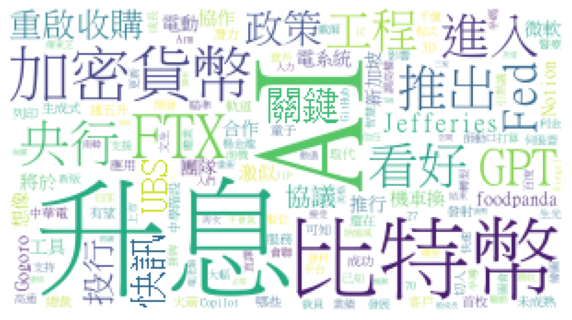

In [59]:
from PIL import Image # PIL：影像處理套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

mask = np.array(Image.open("black_rectangle.png")) # 想呈現的圖案形狀
font = "C:\Windows\Fonts\mingliu.ttc" # 選取想呈現字體的字體路徑

# 把文字變成圖片(文字雲)
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

# 調圖片的大小顯示圖片
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [61]:
# 備份
orgdata.to_csv("crawler_0323.csv", index=False)

In [4]:
# # 計算詞頻並轉換為稀疏矩陣
# df = pd.get_dummies(tokens)
# co_occurrence = np.dot(df.T, df)

In [3]:
# # 繪製共現性網絡圖
# G = nx.Graph()
# for i, word1 in enumerate(df.columns):
#     for j, word2 in enumerate(df.columns):
#         if co_occurrence[i, j] > 0:
#             G.add_edge(word1, word2, weight=co_occurrence[i, j])

In [2]:
# # 調整節點大小和顏色，以及邊線的粗細和顏色
# node_size = [df[word].sum()*10 for word in df.columns]
# node_color = [np.random.rand(3,) for i in range(len(df.columns))]
# edge_width = [d['weight']*0.2 for (u, v, d) in G.edges(data=True)]
# edge_color = [np.random.rand(3,) for i in range(len(G.edges))]

In [1]:
# # 繪製圖形
# pos = nx.spring_layout(G, k=0.3, iterations=50)
# nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, alpha=0.7)
# nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, alpha=0.5)
# nx.draw_networkx_labels(G, pos, font_size=12, font_family='SimHei', font_weight='bold', alpha=0.8)
# plt.axis('off')
# plt.show()